Use this air bnb new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.

In [4]:
import pandas as pd
df1 = pd.read_csv("AB_NYC_2019.csv")
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
min_limit = df1["price"].quantile(0.01)
max_limit = df1["price"].quantile(0.99)
new_df = df1[df1["price"].between(min_limit, max_limit)]
df1.shape, new_df.shape

((48895, 16), (48017, 16))

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("bhp.csv")
df1.head(), df1["price_per_sqft"].describe()

(                   location       size  total_sqft  bath   price  bhk  \
 0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
 1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
 2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
 3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
 4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
 
    price_per_sqft  
 0            3699  
 1            4615  
 2            4305  
 3            6245  
 4            4250  ,
 count    1.320000e+04
 mean     7.920337e+03
 std      1.067272e+05
 min      2.670000e+02
 25%      4.267000e+03
 50%      5.438000e+03
 75%      7.317000e+03
 max      1.200000e+07
 Name: price_per_sqft, dtype: float64)

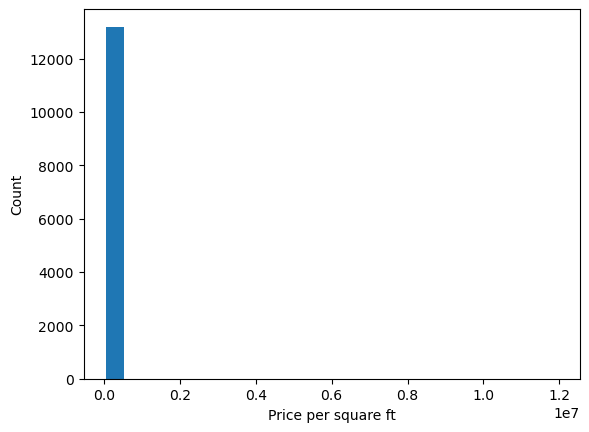

In [7]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8 )
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Others bar were negligible compared to the first bar. This confirms this data has some bad outliers. Using y scale log can help use understand better.

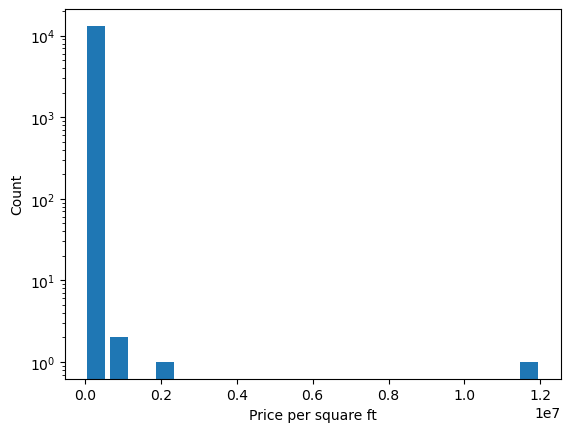

In [8]:
plt.hist(df1["price_per_sqft"], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Quantile Method

In [9]:
min_limit = df1["price_per_sqft"].quantile(0.001)
max_limit = df1["price_per_sqft"].quantile(0.999)
df2 = df1[df1["price_per_sqft"].between(min_limit, max_limit)]
df1.shape, df2.shape, df1.shape[0]-df2.shape[0]

((13200, 7), (13172, 7), 28)

Standard Deviation Method

In [10]:
mean = df2["price_per_sqft"].mean()
std = df2["price_per_sqft"].std()
min_limit = mean - 4*std
max_limit = mean + 4*std
df3 = df2[df2["price_per_sqft"].between(min_limit, max_limit)]
df2.shape, df3.shape, df2.shape[0]-df3.shape[0]

((13172, 7), (13047, 7), 125)

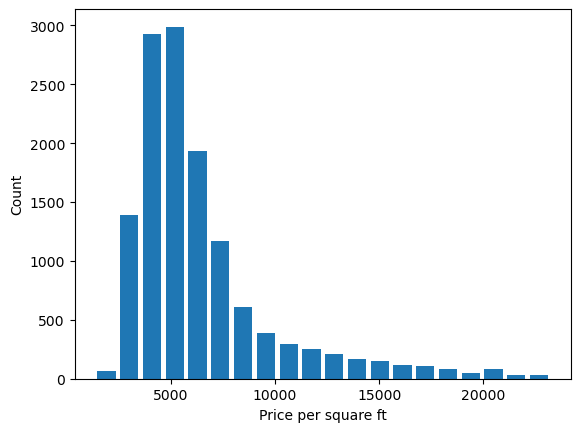

In [11]:
plt.hist(df3["price_per_sqft"], bins=20, rwidth=0.8 )
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

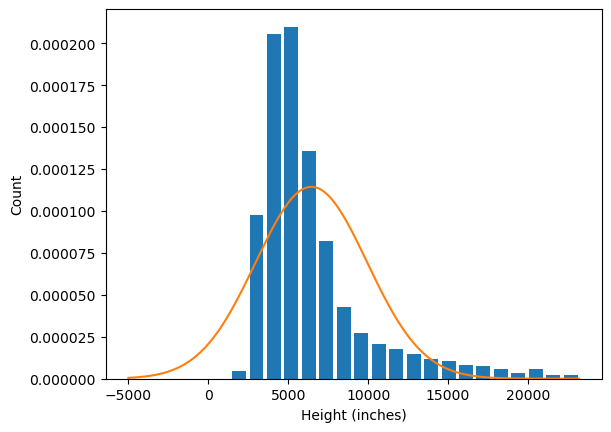

In [12]:
from scipy.stats import norm
import numpy as np

mean = df3["price_per_sqft"].mean()
std = df3["price_per_sqft"].std()

plt.hist(df3["price_per_sqft"], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3["price_per_sqft"].max(), 100)
norm_distribution = norm.pdf(rng, mean, std)
plt.plot(rng, norm_distribution)

The graph shows that there's no outliers

Z Score Method

In [13]:
df2["z_score"] = (df2['price_per_sqft'] - mean) / std
df4 = df2[df2["z_score"].between(-4, 4)]
df2.shape, df4.shape, df2.shape[0]-df4.shape[0]

/var/folders/hg/n24r9jj93w7fwkd71c03mj9h0000gn/T/ipykernel_2600/1168016076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["z_score"] = (df2['price_per_sqft'] - mean) / std


((13172, 8), (12961, 8), 211)

Same output as Standard Deviation method but more convenient

You are given height_weight.csv file which contains heights and weights of 1000 people.
You need to do this.
1. Load this csv in pandas dataframe and first plot histograms for height and weight parameters
2. Using IQR detect weight outliers and print them
3. Using IQR, detect height outliers and print them

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("weight-height.csv")
df1.head(), df1.describe()

(  Gender     Height      Weight
 0   Male  73.847017  241.893563
 1   Male  68.781904  162.310473
 2   Male  74.110105  212.740856
 3   Male  71.730978  220.042470
 4   Male  69.881796  206.349801,
              Height        Weight
 count  10000.000000  10000.000000
 mean      66.367560    161.440357
 std        3.847528     32.108439
 min       54.263133     64.700127
 25%       63.505620    135.818051
 50%       66.318070    161.212928
 75%       69.174262    187.169525
 max       78.998742    269.989699)

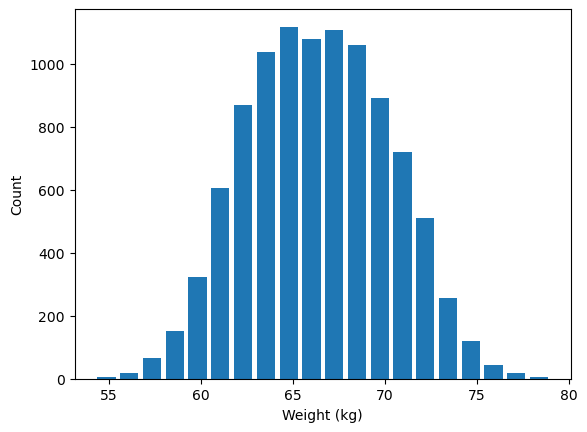

In [19]:
plt.hist(df1["Height"], bins=20, rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

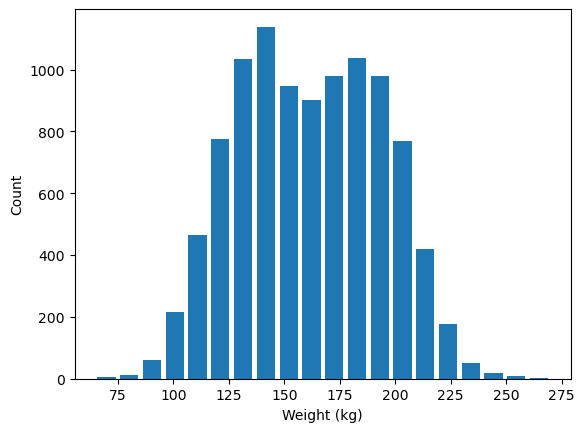

In [20]:
plt.hist(df1["Weight"], bins=20, rwidth=0.8)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

IQR Method

In [22]:
Q1 = df1["Weight"].quantile(0.25)
Q3 = df1["Weight"].quantile(0.75)
IQR = Q3-Q1
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
df1[(df1["Weight"]>max_limit) | (df1["Weight"]<min_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [23]:
Q1 = df1["Height"].quantile(0.25)
Q3 = df1["Height"].quantile(0.75)
IQR = Q3-Q1
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
df1[(df1["Height"]>max_limit) | (df1["Height"]<min_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
